In [1]:
# Read dataset:

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### 1. What is the distribution of age among heart failure patients in the dataset

In [3]:
print(f'mean is',{df['age'].mean()})
print(f'median is',{df['age'].median()})
print(f'mode is',{df['age'].mode()[0]})
print(f'std is',{df['age'].std()})

mean is {60.83389297658862}
median is {60.0}
mode is {60.0}
std is {11.894809074044478}


### 2.How does the death rate vary with age

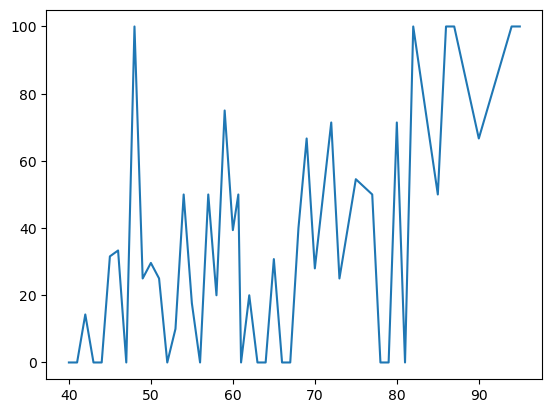

In [4]:
death_rate=df.groupby('age')['DEATH_EVENT'].mean()*100
plt.plot(death_rate)
plt.xlabel='age'
plt.ylabel='DEATH_EVENT'
plt.show()

### 3.What is the percentage of male and female patients in the dataset?

In [5]:
sex_count=df['sex'].value_counts()
total_patients=len(df)
male=(sex_count[1]/total_patients*100)
female=(sex_count[0]/total_patients*100)
print(f'male is:',{male})
print(f'female is:',{female})

male is: {64.88294314381271}
female is: {35.11705685618729}


### 4.How does the platelt count vary among different age groups?

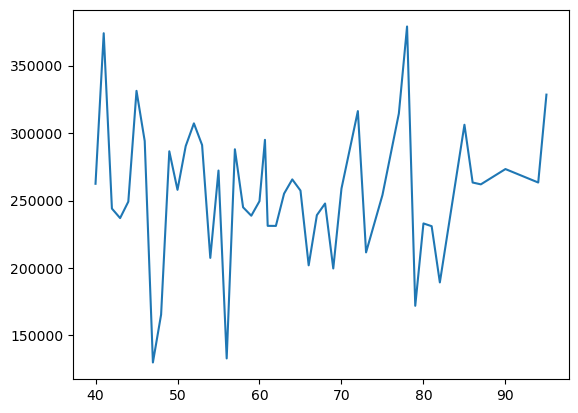

In [6]:
count=df.groupby('age')['platelets'].mean()
plt.plot(count)
plt.xlabel='age'
plt.ylabel='platelets'
plt.show()

### 5. Is there a correlation between creatinline and sodium levels in the blood?


In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
df['serum_creatinine'].corr(df['serum_sodium'])

-0.18909521009117386

### 6. how does the prevalence of high blood pressure differ between male and female patients?


In [9]:
male=df[df['sex']==1]
female=df[df['sex']==0]
hbp_male=male['high_blood_pressure'].mean()*100
hbp_female=female['high_blood_pressure'].mean()*100
print(f'male patients:',{hbp_male})
print(f'female patients:',{hbp_female})

male patients: {31.443298969072163}
female patients: {41.904761904761905}


### 7.what is the relationship between smoking habits and the occurrence of heart failure?


In [10]:
smoker=df[df['smoking']==1]
non_smoker=df[df['smoking']==0]
heart_failure_smoker=smoker['DEATH_EVENT'].mean()*100
heart_failure_non_smoker=non_smoker['DEATH_EVENT'].mean()*100
print(f'SMOKER:',{heart_failure_smoker})
print(f'NON_SMOKER:',{heart_failure_non_smoker})

SMOKER: {31.25}
NON_SMOKER: {32.51231527093596}


### 8. Are there any noticeable patterns in the distribution of death events across different age groups?


age
40.000      0.000000
41.000      0.000000
42.000     14.285714
43.000      0.000000
44.000      0.000000
45.000     31.578947
46.000     33.333333
47.000      0.000000
48.000    100.000000
49.000     25.000000
50.000     29.629630
51.000     25.000000
52.000      0.000000
53.000     10.000000
54.000     50.000000
55.000     17.647059
56.000      0.000000
57.000     50.000000
58.000     20.000000
59.000     75.000000
60.000     39.393939
60.667     50.000000
61.000      0.000000
62.000     20.000000
63.000      0.000000
64.000      0.000000
65.000     30.769231
66.000      0.000000
67.000      0.000000
68.000     40.000000
69.000     66.666667
70.000     28.000000
72.000     71.428571
73.000     25.000000
75.000     54.545455
77.000     50.000000
78.000      0.000000
79.000      0.000000
80.000     71.428571
81.000      0.000000
82.000    100.000000
85.000     50.000000
86.000    100.000000
87.000    100.000000
90.000     66.666667
94.000    100.000000
95.000    100.000000
Name: DEA

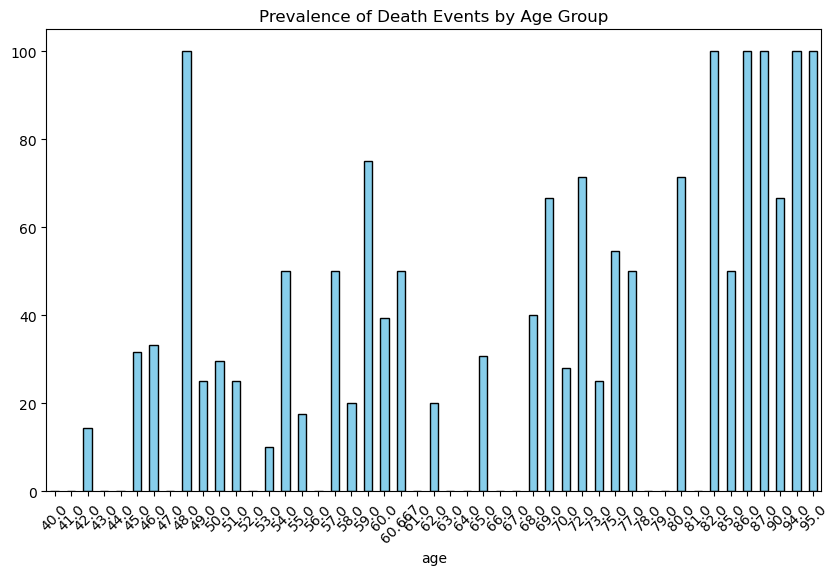

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
age_group_death_prevalence = df.groupby('age')['DEATH_EVENT'].mean() * 100
print(age_group_death_prevalence)
plt.figure(figsize=(10, 6))
age_group_death_prevalence.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Prevalence of Death Events by Age Group')
plt.xticks(rotation=45)
plt.show()

### 9. Is there any significant difference in ejection fraction between patients with and without diabetes?


In [22]:
with_diabetic=df[df['diabetes']==0]
without_diabetic=df[df['diabetes']==1]
ejection_fraction_withdiabetic=with_diabetic['ejection_fraction'].mean()*100
ejection_fraction_withoutdiabetic=without_diabetic['ejection_fraction'].mean()*100
print(f'with diabetic patients of ejection fraction is:',{ejection_fraction_withdiabetic})
print(f'without diabetic patients of ejection fraction is:',{ejection_fraction_withoutdiabetic})      

with diabetic patients of ejection fraction is: {3813.218390804597}
without diabetic patients of ejection fraction is: {3801.6}


### 10. How does the serum creatinine level vary between patients who survived and those who did not?

In [26]:
servived=df[df['DEATH_EVENT']==0]
dead=df[df['DEATH_EVENT']==1]
serum_creatinine_level_servived=servived['serum_creatinine'].mean()*100
serum_creatinine_level_dead=dead['serum_creatinine'].mean()*100
print(f'patients did servived:',{serum_creatinine_level_servived})
print(f'patients did not servived:',{serum_creatinine_level_dead})

patients did servived: {118.48768472906403}
patients did not servived: {183.58333333333334}
